<h1><b>Loading the data</b></h1>


    Use only the following columns:
        'neighbourhood_group',
        'room_type',
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews','reviews_per_month',
        'calculated_host_listings_count',
        'availability_365',
        'price'
    Fill NAs with 0
    Apply the log tranform to price
    Do train/validation/test split with 60%/20%/20% distribution.
    Use the train_test_split function and set the random_state parameter to 1
    Use DictVectorizer to turn the dataframe into matrices


In [108]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [109]:
df = pd.read_csv('AB_NYC_2019.csv')

In [110]:
cols = list(['neighbourhood_group','room_type', 'latitude', 'longitude', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365', 'price'])
df = df[cols]
df.head()

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,Brooklyn,Private room,40.64749,-73.97237,1,9,0.21,6,365,149
1,Manhattan,Entire home/apt,40.75362,-73.98377,1,45,0.38,2,355,225
2,Manhattan,Private room,40.80902,-73.94190,3,0,NaN,1,365,150
3,Brooklyn,Entire home/apt,40.68514,-73.95976,1,270,4.64,1,194,89
4,Manhattan,Entire home/apt,40.79851,-73.94399,10,9,0.10,1,0,80


In [111]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [112]:
df = df.fillna(0)
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

In [113]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [114]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

del df_train['price']
del df_val['price']
del df_test['price']

In [115]:
df_train.head()

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Queens,Entire home/apt,40.76434,-73.92132,4,30,0.32,1,363
1,Brooklyn,Private room,40.73442,-73.95854,5,2,0.16,1,0
2,Brooklyn,Entire home/apt,40.66359,-73.99487,1,33,2.75,5,113
3,Brooklyn,Private room,40.63766,-74.02626,3,1,0.12,2,362
4,Brooklyn,Private room,40.65118,-74.00842,2,0,0.00,2,365


In [116]:
from sklearn.feature_extraction import DictVectorizer

In [117]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [118]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

<h1><b>Question 1</b></h1>

Let's train a decision tree regressor to predict the price variable.

    Train a model with max_depth=1

Which feature is used for splitting the data?

    room_type
    neighbourhood_group
    number_of_reviews
    reviews_per_month


In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [123]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [124]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



<h3><b>Q1 Answer: room_type</b></h3>

<h1><b>Question 2</b></h1>

Train a random forest model with these parameters:

    n_estimators=10
    random_state=1
    n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

    0.059
    0.259
    0.459
    0.659


In [143]:
from sklearn.ensemble import RandomForestRegressor

In [144]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [145]:
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [146]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

In [147]:
y_pred = rf.predict(X_val)
#y_pred
rmse(y_val, y_pred)

0.4598535778342608

<h3><b>Q2 Answer: 0.459</b></h3>

<h1><b>Question 3</b></h1>

Now let's experiment with the n_estimators parameter

    Try different values of this parameter from 10 to 200 with step 10
    Set random_state to 1
    Evaluate the model on the validation dataset

After which value of n_estimators does RMSE stop improving?

    10
    50
    70
    120


In [162]:
scores = []

for n in range(1, 21):
    n_estim = n * 10
    rf = RandomForestRegressor(n_estimators=n_estim, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score = rmse(y_val, y_pred)
    scores.append((n_estim, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'score'])

In [163]:
df_scores

,n_estimators,score
0,10,0.459854
1,20,0.447831
2,30,0.445120
3,40,0.443225
4,50,0.442231
5,60,0.441535
6,70,0.440867
7,80,0.440763
8,90,0.440244
9,100,0.439783


<h3><b>Q3 Answer: 10</b></h3>

<h1><b>Question 4</b></h1>

Let's select the best max_depth:

    Try different values of max_depth: [10, 15, 20, 25]
    For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
    Fix the random seed: random_state=1

What's the best max_depth:

    10
    15
    20
    25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

In [165]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(1, 21):
        n_estim = n * 10
        rf = RandomForestRegressor(n_estimators=n_estim, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        score = rmse(y_val, y_pred)
        scores.append((d, n_estim, score))

df_scores = pd.DataFrame(scores, columns=['max_depth','n_estimators', 'score'])

In [168]:
df_scores.sort_values(by='score', ascending=False).head()

,max_depth,n_estimators,score
60,25,10,0.460700
40,20,10,0.459764
20,15,10,0.449818
61,25,20,0.447923
41,20,20,0.446806


<h3><b>Q4 Answer: 20</b></h3>

<h1><b>Question 5</b></h1>

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

    Train the model with these parametes:
        n_estimators=10,
        max_depth=20,
        random_state=1,
        n_jobs=-1 (optional)
    Get the feature importance information from this model

What's the most important feature?

    neighbourhood_group=Manhattan
    room_type=Entire home/apt
    longitude
    latitude


In [199]:
scores = []

for s in [5000, 9000, 9300, 10000, 20000]:
    rf = RandomForestRegressor(n_estimators=10, max_depth=20, min_samples_leaf=s, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score = rmse(y_val, y_pred)
    scores.append((s, score))

df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'score'])

In [200]:
df_scores.sort_values(by='score', ascending=False).head()

,min_samples_leaf,score
2,9300,0.702542
3,10000,0.702542
4,20000,0.702542
1,9000,0.645301
0,5000,0.548795


In [201]:
min_samples_leaf = 9300

In [217]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, min_samples_leaf=9300, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
score = rmse(y_val, y_pred)
importances = rf.feature_importances_
score

0.7025417990050375

In [221]:
feature_names = [f'{i}' for i in range(X_train.shape[1])]

In [226]:
dv.feature_names_

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

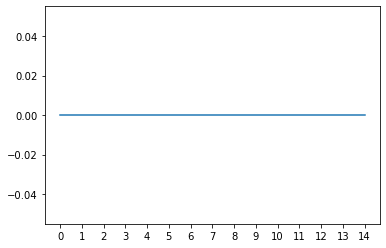

In [222]:
plt.plot(feature_names, importances)

In [223]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
score = rmse(y_val, y_pred)
importances = rf.feature_importances_
score

0.45976438614210824

In [227]:
dv.feature_names_

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

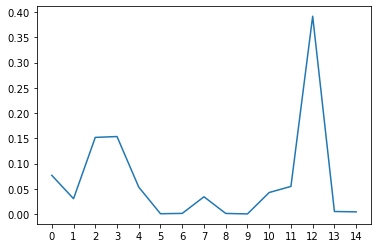

In [224]:
plt.plot(feature_names, importances)

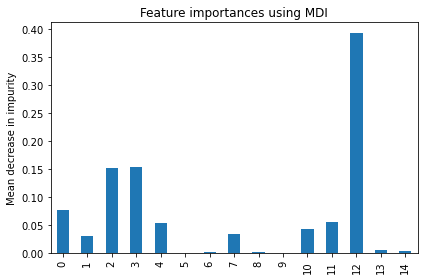

In [229]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<h3><b>Q5 Answer: room_type=Entire home/apt</b></h3>

<h1><b>Question 6</b></h1>

Now let's train an XGBoost model! For this question, we'll tune the eta parameter

    Install XGBoost
    Create DMatrix for train and validation
    Create a watchlist
    Train a model with these parameters for 100 rounds:

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

Now change eta first to 0.1 and then to 0.01

Which eta leads to the best RMSE score on the validation dataset?

    0.3
    0.1
    0.01


In [260]:
import xgboost as xgb

In [261]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [262]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [263]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=5)

[0]	train-rmse:3.02752	val-rmse:3.02415
[5]	train-rmse:0.67490	val-rmse:0.67752
[10]	train-rmse:0.43912	val-rmse:0.44981
[15]	train-rmse:0.42259	val-rmse:0.43827
[20]	train-rmse:0.41716	val-rmse:0.43691
[25]	train-rmse:0.41365	val-rmse:0.43621
[30]	train-rmse:0.40712	val-rmse:0.43543
[35]	train-rmse:0.40444	val-rmse:0.43510
[40]	train-rmse:0.40103	val-rmse:0.43466
[45]	train-rmse:0.39723	val-rmse:0.43371
[50]	train-rmse:0.39446	val-rmse:0.43384
[55]	train-rmse:0.39129	val-rmse:0.43378
[60]	train-rmse:0.38743	val-rmse:0.43404
[65]	train-rmse:0.38421	val-rmse:0.43450
[70]	train-rmse:0.38117	val-rmse:0.43467
[75]	train-rmse:0.37801	val-rmse:0.43489
[80]	train-rmse:0.37668	val-rmse:0.43526
[85]	train-rmse:0.37259	val-rmse:0.43537
[90]	train-rmse:0.36998	val-rmse:0.43539
[95]	train-rmse:0.36742	val-rmse:0.43579
[99]	train-rmse:0.36478	val-rmse:0.43621


In [280]:
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [288]:
scores = {}

In [293]:
%%capture output
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dval, num_boost_round=100, evals=watchlist, verbose_eval=5)

In [294]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1', 'eta=0.01'])

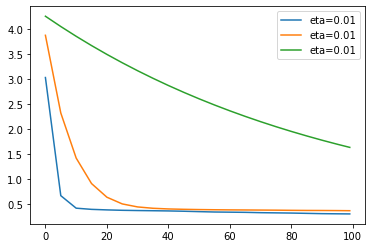

In [298]:
etas = ['eta=0.3', 'eta=0.1', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_rmse, label=key)

plt.legend()

<h3><b>Q6 Answer: 0.01</b></h3>